In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [5]:
x = np.load('x_train.npy')

In [6]:
def normal_pdf(x, mu, sigma):
    return 1/(sigma * tf.sqrt(2*tf.constant(np.pi))) * tf.exp(-(x-mu)**2/(2*sigma**2))

def log_likelihood(x, mu, sigma):
    return tf.reduce_sum(tf.math.log(normal_pdf(x, mu, sigma)))

optimizer = tf.optimizers.SGD(learning_rate=0.1)

2023-03-28 17:22:15.224470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-28 17:22:15.224492: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-28 17:22:15.224511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ynk): /proc/driver/nvidia/version does not exist
2023-03-28 17:22:15.225706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
@tf.function
def train_step(x, mu, sigma):
    with tf.GradientTape() as tape:
        loss = -log_likelihood(x, mu, sigma)
    gradients = tape.gradient(loss, [mu, sigma])
    gradients = [g + tf.random.normal(g.shape, mean=0.0, stddev=0.1) for g in gradients]
    optimizer.apply_gradients(zip(gradients, [mu, sigma]))

    return loss

In [10]:
mu = tf.Variable(tf.math.reduce_mean(x))
sigma = tf.Variable(tf.math.reduce_std(x))

for i in range(1500):
    loss = train_step(x, mu, sigma)
    if i % 100 == 0:
        tf.print(f"Iteração {i}: log-verossimilhança = {loss:.4f}, mu = {mu.numpy():.4f}, sigma = {sigma.numpy():.4f}")


Iteração 0: log-verossimilhança = 4109.0693, mu = 100.0704, sigma = 14.7238
Iteração 100: log-verossimilhança = 4109.0742, mu = 100.0647, sigma = 14.7307
Iteração 200: log-verossimilhança = 4109.0703, mu = 100.0704, sigma = 14.7228
Iteração 300: log-verossimilhança = 4109.0703, mu = 100.0827, sigma = 14.7423
Iteração 400: log-verossimilhança = 4109.0703, mu = 100.0773, sigma = 14.7304
Iteração 500: log-verossimilhança = 4109.0698, mu = 100.0854, sigma = 14.7197
Iteração 600: log-verossimilhança = 4109.0703, mu = 100.0553, sigma = 14.7342
Iteração 700: log-verossimilhança = 4109.0698, mu = 100.0647, sigma = 14.7300
Iteração 800: log-verossimilhança = 4109.0703, mu = 100.0752, sigma = 14.7231
Iteração 900: log-verossimilhança = 4109.0698, mu = 100.0631, sigma = 14.7351
Iteração 1000: log-verossimilhança = 4109.0703, mu = 100.0904, sigma = 14.7483
Iteração 1100: log-verossimilhança = 4109.0713, mu = 100.0805, sigma = 14.7406
Iteração 1200: log-verossimilhança = 4109.0703, mu = 100.0689, s

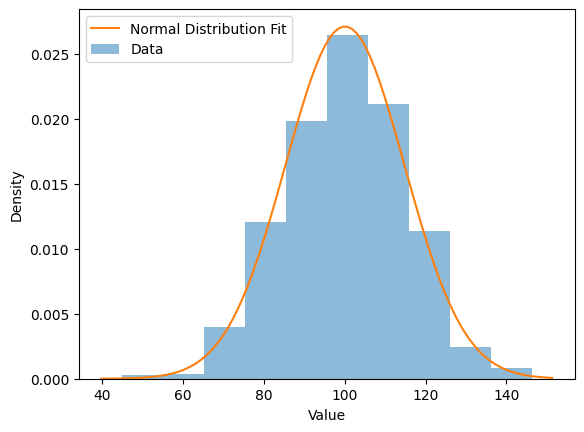

In [13]:
dist = norm(mu, sigma)

plt.hist(x, density=True, alpha=0.5)
xmin, xmax = plt.xlim()
x_axis = np.linspace(xmin, xmax, 100)
plt.plot(x_axis, dist.pdf(x_axis))
plt.legend(['Normal Distribution Fit', 'Data'])
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()